In [1]:
########
#An ML algorithm to determine total gas reserve from decline curve analysis(DCA) data
#The problem is solved by predicting the cumulative gas production when a economic rate of 15 MMSCF/day is achieved from the wells
########
##importing the libraries 
import numpy as np

In [2]:
import pandas as pd

In [3]:
##reading the data
data=pd.read_csv("C:\\Users\\admin\\Documents\\study\\petro 2nd yr\\machine learning\\declinecurve.csv")

In [4]:
data

,Gp(MMSCF),qt(MMSCF/d)
0,16000.0,320.0
1,32000.0,336.0
2,NaN,NaN
3,NaN,NaN
4,40000.0,NaN
5,48000.0,304.0
6,60000.0,NaN
7,96000.0,309.0
8,160000.0,272.0
9,240000.0,248.0


In [5]:
##dropping the rows those conatin any missing data
finaldata=data.dropna(how='any')
finaldata

,Gp(MMSCF),qt(MMSCF/d)
0,16000.0,320.0
1,32000.0,336.0
5,48000.0,304.0
7,96000.0,309.0
8,160000.0,272.0
9,240000.0,248.0
10,304000.0,208.0
12,352000.0,197.0
13,368000.0,184.0
14,384000.0,176.0


In [6]:
##assigning x and y values
y=finaldata.iloc[:,0].values

In [7]:
y

array([ 16000.,  32000.,  48000.,  96000., 160000., 240000., 304000.,
       352000., 368000., 384000., 400000.])

In [8]:
x1=finaldata.iloc[:,-1].values

In [9]:
##changing the dimensionality of x
x=np.reshape(x1,(-1,1))
x

array([[320.],
       [336.],
       [304.],
       [309.],
       [272.],
       [248.],
       [208.],
       [197.],
       [184.],
       [176.],
       [184.]])

In [10]:
#imprting linear regression classifier
from sklearn.linear_model import LinearRegression

In [11]:
##calling the classifier
classifier=LinearRegression()

In [12]:
##training the datasets
classifier.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
##finding the slope
classifier.coef_

array([-2445.1485794])

In [14]:
##finding intercept
classifier.intercept_

826801.5282178621

In [15]:
##checking accuracy
classifier.score(x,y)*100

97.92881496389906

In [16]:
##predictting y value
y_prediction=classifier.predict([[15]])
Gp=y_prediction
Gp

array([790124.29952687])

In [17]:
##displaying the plots
import matplotlib.pyplot as plt

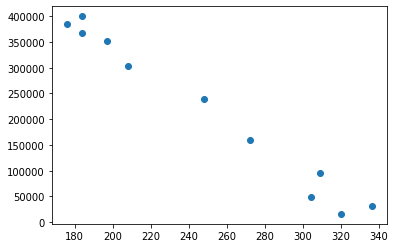

In [18]:
plt.scatter(x,y)

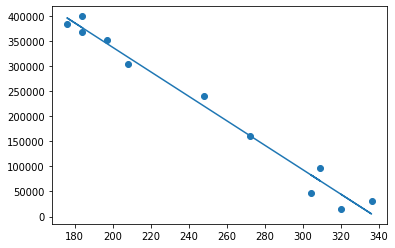

In [19]:
plt.scatter(x,y)
plt.plot(x,classifier.predict(x))
plt.show()

In [20]:
##printing final result
print("Total recoverable gas reserve in place(GIIP)= ",Gp,"MMSCF")

Total recoverable gas reserve in place(GIIP)=  [790124.29952687] MMSCF
